# Ejercicio 1: Introducción a Recuperación de Información

## Objetivo de la práctica
- Entender el problema de **buscar información** en colecciones de texto.
- Comprender por qué se necesita un **índice invertido** en recuperación de información.
- Programar una primera solución manual y luego optimizarla con un índice.
- Evaluar la mejora en tiempos de búsqueda cuando usamos estructuras adecuadas.

## Parte 1: Búsqueda lineal en documentos

### Actividad
1. Se te proporcionará un dataset con reviews de películas.
2. Escribe una función que:
   - Lea todos los documentos.
   - Busque una palabra ingresada por el usuario.
   - Muestre en qué documentos aparece la palabra.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [22]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [50]:
def hasquerry(docs, querry):
    mask = docs.astype(str).str.contains(query)
    result = docs[mask]
    return result

In [51]:
query = "Felipe"
mask = df["review"].str.contains(query)
df[mask]

,review,sentiment
9051,This film is a great disappointment. Director ...,negative
18640,An Intelligent and well obtained film worth to...,positive
23452,Vicente Aranda has made a terrible historical ...,negative
37327,Feisty Dianna Jackson (a winningly spunky perf...,positive
46041,Bluff I really think this movie is very good.<...,positive


## Parte 2: Construcción de un índice invertido

### Actividad
1. Escribe un programa que:
   - Recorra todos los documentos.
   - Construya un **índice invertido**, es decir, un diccionario donde:
     - Cada palabra clave apunta a una lista de documentos donde aparece.

2. Escribe una nueva función de búsqueda que:
   - Consulte directamente el índice para encontrar los documentos relevantes.
   - Sea mucho más rápida que la búsqueda lineal.

In [26]:
def def construir_indice_invertido_filtrado(docs, palabras_objetivo):
    palabras_objetivo = set(p.lower() for p in palabras_objetivo)
    indice = {}
    for i, texto in enumerate(docs.astype(str)):
        for palabra in texto.lower().split():
            palabra = palabra.strip(".,!?()[]{}\"'")
            if palabra in palabras_objetivo:
                if palabra not in indice:
                    indice[palabra] = [i]
                elif i not in indice[palabra]:
                    indice[palabra].append(i)
    return indice
indice_invertido(docs):
    indice = {}
    for i, texto in enumerate(docs.astype(str)):
        for palabra in texto.lower().split():
            palabra = palabra.strip(".,!?()[]{}\"'") 
            if palabra not in indice:
                indice[palabra] = [i]
            elif i not in indice[palabra]:
                indice[palabra].append(i)
    return indice

In [27]:
def indice_invertido_filtrado(docs, palabras_objetivo):
    palabras_objetivo = set(p.lower() for p in palabras_objetivo)
    indice = {}
    for i, texto in enumerate(docs.astype(str)):
        for palabra in texto.lower().split():
            palabra = palabra.strip(".,!?()[]{}\"'")
            if palabra in palabras_objetivo:
                if palabra not in indice:
                    indice[palabra] = [i]
                elif i not in indice[palabra]:
                    indice[palabra].append(i)
    return indice


In [28]:
def buscar_indice(indice, query):
    palabras = query.lower().split()
    docs = set(indice.get(palabras[0], []))
    for palabra in palabras[1:]:
        docs &= set(indice.get(palabra, []))  # intersección
    return sorted(docs)

## 1. Parte 3: Evaluación de tiempos de búsqueda
### Actividad

1. Realiza la búsqueda de varias palabras usando:
      -  Corpus pequeño.
      -  Corpus grande.
2. Mide el tiempo de ejecución:
      -  Para búsqueda lineal.
      -  Para búsqueda usando índice invertido.
      -  Grafica o presenta los resultados en una tabla comparativa.

In [29]:
df_large = pd.read_csv("/kaggle/input/clapper-massive-rotten-tomatoes-movies-and-reviews/rotten_tomatoes_movie_reviews.csv")
df_large

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
...,...,...,...,...,...,...,...,...,...,...,...
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...


In [36]:
palabras_objetivo = ["wonderful"]
query = "wonderful"

In [56]:
t0 = time.time()
resultado_lineal_pequeno = hasquerry(df["review"], query)
tiempo_lineal_pequeno = time.time() - t0

indice_pequeno = indice_invertido_filtrado(df["review"], palabras_objetivo)
t0 = time.time()
resultado_indice_pequeno = buscar_indice(indice_pequeno, query)
tiempo_indice_pequeno = time.time() - t0

In [57]:
t0 = time.time()
resultado_lineal_grande = hasquerry(df_large["reviewText"], query)
tiempo_lineal_grande = time.time() - t0

indice_grande = indice_invertido_filtrado(df_large["reviewText"], palabras_objetivo)
t0 = time.time()
resultado_indice_grande = buscar_indice(indice_grande, query)
tiempo_indice_grande = time.time() - t0

In [58]:
tabla_datos = {
    "Corpus": ["Pequeño", "Grande"],
    "Búsqueda lineal (s)": [tiempo_lineal_pequeno, tiempo_lineal_grande],
    "Índice invertido (s)": [tiempo_indice_pequeno, tiempo_indice_grande],
    "Resultados lineal": [len(resultado_lineal_pequeno), len(resultado_lineal_grande)],
    "Resultados índice": [len(resultado_indice_pequeno), len(resultado_indice_grande)]
}

tabla_resultados = pd.DataFrame(tabla_datos)

print(tabla_resultados)

    Corpus  Búsqueda lineal (s)  Índice invertido (s)  Resultados lineal  \
0  Pequeño             0.058136              0.000087                  5   
1   Grande             0.635711              0.000091                 12   

   Resultados índice  
0                  0  
1                  0  


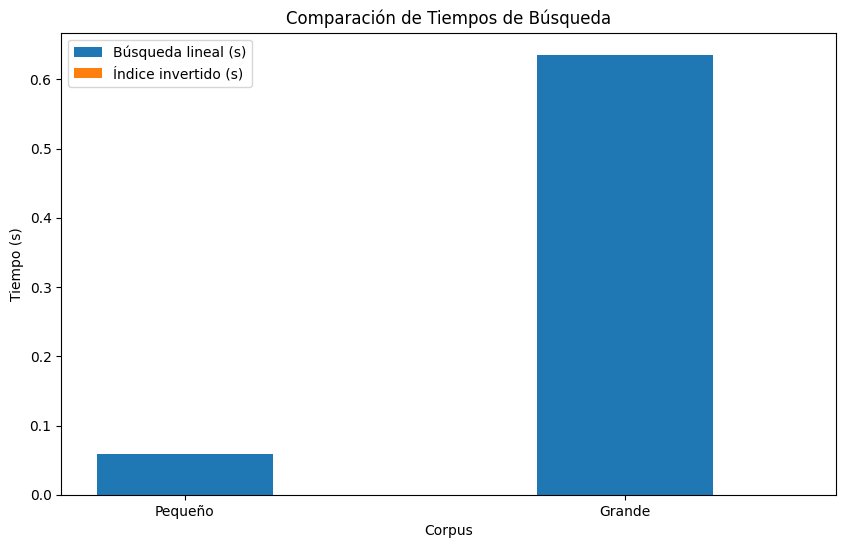

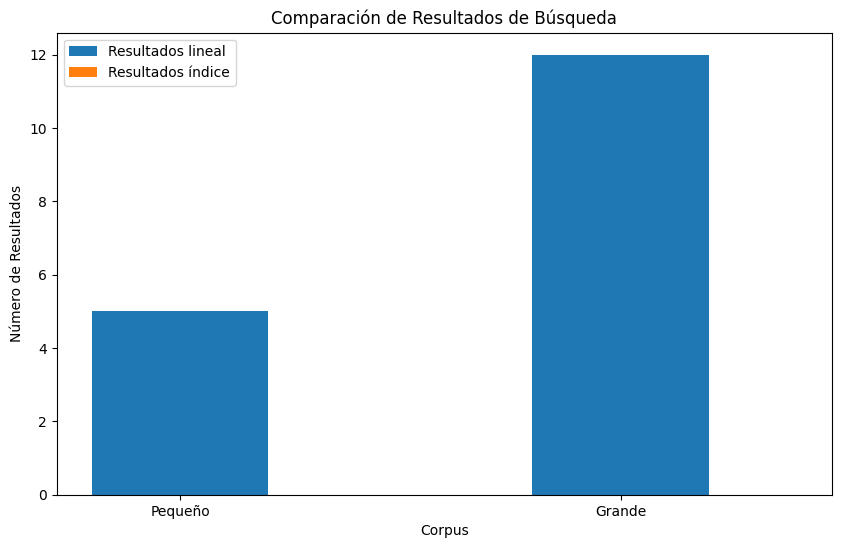

In [60]:
tabla_resultados = pd.DataFrame(tabla_datos)

plt.figure(figsize=(10, 6))
plt.bar(tabla_resultados["Corpus"], tabla_resultados["Búsqueda lineal (s)"], width=0.4, label="Búsqueda lineal (s)", align="center")
plt.bar(tabla_resultados["Corpus"], tabla_resultados["Índice invertido (s)"], width=0.4, label="Índice invertido (s)", align="edge")

plt.xlabel('Corpus')
plt.ylabel('Tiempo (s)')
plt.title('Comparación de Tiempos de Búsqueda')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(tabla_resultados["Corpus"], tabla_resultados["Resultados lineal"], width=0.4, label="Resultados lineal", align="center")
plt.bar(tabla_resultados["Corpus"], tabla_resultados["Resultados índice"], width=0.4, label="Resultados índice", align="edge")

plt.xlabel('Corpus')
plt.ylabel('Número de Resultados')
plt.title('Comparación de Resultados de Búsqueda')
plt.legend()
plt.show()